<a href="https://colab.research.google.com/github/Allen0429/AI_Launch/blob/main/CSC420_A3_Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig
from scipy.ndimage import gaussian_filter

!pip install opencv-python
import cv2

(450, 800)


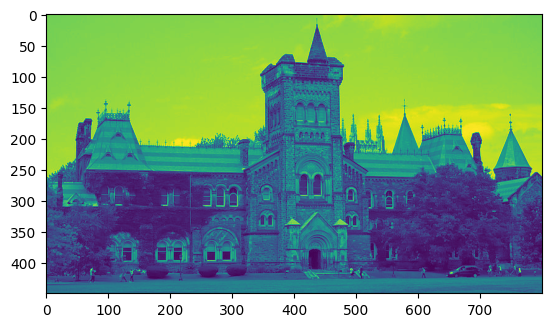

In [3]:
img1 = cv2.imread('/content/drive/My Drive/CSC420/A3/uoft2.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

img2 = cv2.imread('q4_2.jpg')
img2 = cv2.imread('/content/drive/My Drive/CSC420/A3/uoft1.jpg')

print(img1.shape)
plt.imshow(img1)

In [4]:
print(img1.shape)

(450, 800)


In [5]:
# def get_M(img):

#     gradient_x = cv2.Sobel(img, cv2.CV_32F, 1, 0)
#     gradient_y = cv2.Sobel(img, cv2.CV_32F, 0, 1)

#     print(gradient_x.shape)

#     I_xy = np.multiply(gradient_x, gradient_y)
#     I_x2 = np.multiply(gradient_x, gradient_x)
#     I_y2 = np.multiply(gradient_y, gradient_y)

#     print(I_xy.shape)
#     print(I_x2.shape)

#     M = np.zeros((img.shape[0], img.shape[1], 2, 2))

#     ksize = 3

#     M[:, :, 0, 0] = cv2.GaussianBlur(I_x2, (ksize, ksize), 10)
#     M[:, :, 0, 1] = cv2.GaussianBlur(I_xy, (ksize, ksize), 10)
#     M[:, :, 1, 0] = cv2.GaussianBlur(I_xy, (ksize, ksize), 10)
#     M[:, :, 1, 1] = cv2.GaussianBlur(I_y2, (ksize, ksize), 10)

#     return M


# M = get_M(img2)
def get_M(img):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    gradient_x = cv2.Sobel(gray, cv2.CV_32F, 1, 0)
    gradient_y = cv2.Sobel(gray, cv2.CV_32F, 0, 1)

    I_xy = np.multiply(gradient_x, gradient_y)
    I_x2 = np.multiply(gradient_x, gradient_x)
    I_y2 = np.multiply(gradient_y, gradient_y)

    M = np.zeros((gray.shape[0], gray.shape[1], 2, 2))
    ksize = 3

    M[:, :, 0, 0] = cv2.GaussianBlur(I_x2, (ksize, ksize), 10)
    M[:, :, 0, 1] = cv2.GaussianBlur(I_xy, (ksize, ksize), 10)
    M[:, :, 1, 0] = cv2.GaussianBlur(I_xy, (ksize, ksize), 10)
    M[:, :, 1, 1] = cv2.GaussianBlur(I_y2, (ksize, ksize), 10)

    return M

# Use this function with a color image
M = get_M(img2)


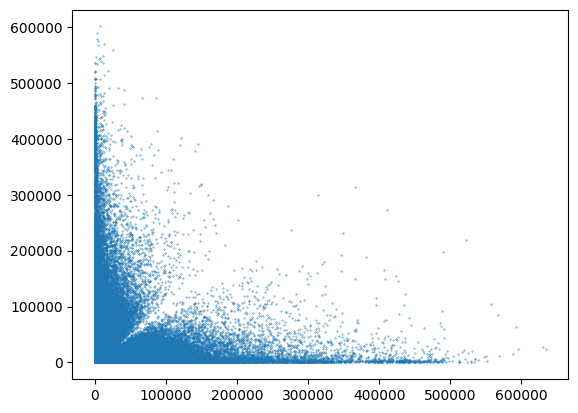

In [6]:
def get_eigenvalue():

    eigenvalue, eigenvector = eig(M)

    all_e1 = []
    all_e2 = []

    e1 = []
    e2 = []
    for i in range(img2.shape[0]):
        row1 = []
        row2 = []
        for j in range(img2.shape[1]):
            row1.append(eigenvalue[i][j][0])
            row2.append(eigenvalue[i][j][1])

            all_e1.append(eigenvalue[i][j][0])
            all_e2.append(eigenvalue[i][j][1])

        e1.append(row1)
        e2.append(row2)

    plt.scatter(all_e1, all_e2, s=0.1)
    plt.show()

    return e1, e2


eigenvalue1, eigenvalue2 = get_eigenvalue()

0

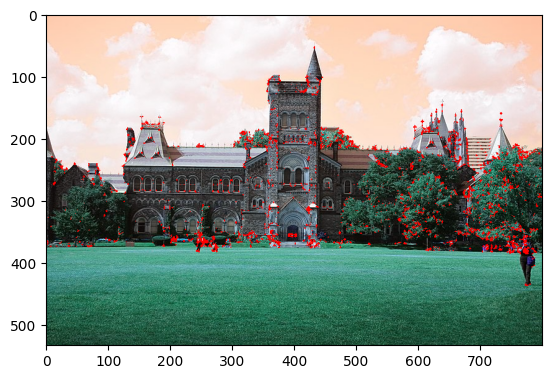

In [7]:
def detect_corner(img):

    threshold = 25000

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):

            if min(eigenvalue1[i][j], eigenvalue2[i][j]) > threshold:

                # coloring corner as red
                img[i][j][0] = 255
                img[i][j][1] = 0
                img[i][j][2] = 0

    plt.imshow(img)

    return 0


img = cv2.imread('/content/drive/My Drive/CSC420/A3/uoft1.jpg')
detect_corner(img)